<a href="https://colab.research.google.com/github/dgx781/Deep-learning/blob/DataScience-Ocean/VGG_16_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
from keras.applications.vgg16 import VGG16

In [15]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [9]:
conv_base= VGG16(weights='imagenet',
                 include_top=False,
                 input_shape= (256,256,3))

In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [11]:
model= keras.Sequential()
model.add(conv_base)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 256)               8388864   
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 23103809 (88.13 MB)
Trainable params: 8389121 (32.00 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [13]:
conv_base.trainable= False

In [19]:
train_ds= keras.utils.image_dataset_from_directory(
    directory='/content/mydrive/MyDrive/Dataset/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

val_ds= keras.utils.image_dataset_from_directory(
    directory='/content/mydrive/MyDrive/Dataset/val',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 66 files belonging to 2 classes.
Found 54 files belonging to 2 classes.


# **DATA AUGMENTATION FOR OVERFITTING**

In [31]:
train_gen= keras.preprocessing.image.ImageDataGenerator(
    rescale= 1./255,
    shear_range=0.2,
    zoom_range=0.5,
    horizontal_flip=True
)

test_gen= keras.preprocessing.image.ImageDataGenerator(rescale= 1./255)

train_datagen= train_gen.flow_from_directory(
   '/content/mydrive/MyDrive/Dataset/train',
   target_size= (256, 256),
   batch_size= 32,
   class_mode='binary'
)

val_datagen= test_gen.flow_from_directory(
   '/content/mydrive/MyDrive/Dataset/val',
   target_size= (256, 256),
   batch_size= 32,
   class_mode='binary'
)

Found 66 images belonging to 2 classes.
Found 54 images belonging to 2 classes.


In [20]:
def process(image, label):
  image= tf.cast(image/255, tf.float32)
  return image, label

train_ds= train_ds.map(process)

In [21]:
val_ds= val_ds.map(process)

In [23]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# **MODEL HISTORY BEFORE DATA AUGMENTATION**

In [24]:
history= model.fit(train_ds, epochs=10, validation_data= val_ds)

Epoch 1/10
3/3 [==============================] - 48s 11s/step - loss: 4.0050 - accuracy: 0.5455 - val_loss: 0.4606 - val_accuracy: 0.8333
Epoch 2/10
3/3 [==============================] - 2s 740ms/step - loss: 0.5496 - accuracy: 0.8636 - val_loss: 2.5699 - val_accuracy: 0.6852
Epoch 3/10
3/3 [==============================] - 2s 741ms/step - loss: 0.9500 - accuracy: 0.8182 - val_loss: 0.7894 - val_accuracy: 0.7963
Epoch 4/10
3/3 [==============================] - 3s 745ms/step - loss: 0.1696 - accuracy: 0.9545 - val_loss: 0.7471 - val_accuracy: 0.8333
Epoch 5/10
3/3 [==============================] - 3s 684ms/step - loss: 0.3106 - accuracy: 0.9091 - val_loss: 0.4786 - val_accuracy: 0.9074
Epoch 6/10
3/3 [==============================] - 2s 743ms/step - loss: 0.0055 - accuracy: 1.0000 - val_loss: 0.5810 - val_accuracy: 0.8704
Epoch 7/10
3/3 [==============================] - 2s 743ms/step - loss: 4.9706e-04 - accuracy: 1.0000 - val_loss: 0.8234 - val_accuracy: 0.8333
Epoch 8/10
3/3 [=

# **LOSS AND ACCURACY AFTER DATA AUGMENTATION**

In [32]:
history1= model.fit_generator(train_datagen, epochs=10, validation_data= val_datagen)

<ipython-input-32-ca813b9b996e>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history1= model.fit_generator(train_datagen, epochs=10, validation_data= val_datagen)


Epoch 1/10
3/3 [==============================] - 4s 1s/step - loss: 1.2315 - accuracy: 0.8030 - val_loss: 0.7483 - val_accuracy: 0.9074
Epoch 2/10
3/3 [==============================] - 4s 2s/step - loss: 1.5552 - accuracy: 0.7121 - val_loss: 0.4775 - val_accuracy: 0.9074
Epoch 3/10
3/3 [==============================] - 3s 2s/step - loss: 0.3405 - accuracy: 0.9091 - val_loss: 0.7563 - val_accuracy: 0.8333
Epoch 4/10
3/3 [==============================] - 3s 895ms/step - loss: 0.2053 - accuracy: 0.9242 - val_loss: 0.4871 - val_accuracy: 0.9074
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.1469 - accuracy: 0.9545 - val_loss: 0.5957 - val_accuracy: 0.9074
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 0.3633 - accuracy: 0.9091 - val_loss: 0.4698 - val_accuracy: 0.8519
Epoch 7/10
3/3 [==============================] - 3s 856ms/step - loss: 0.1186 - accuracy: 0.9545 - val_loss: 0.4805 - val_accuracy: 0.8889
Epoch 8/10
3/3 [===================

In [26]:
plt.style.use('dark_background')

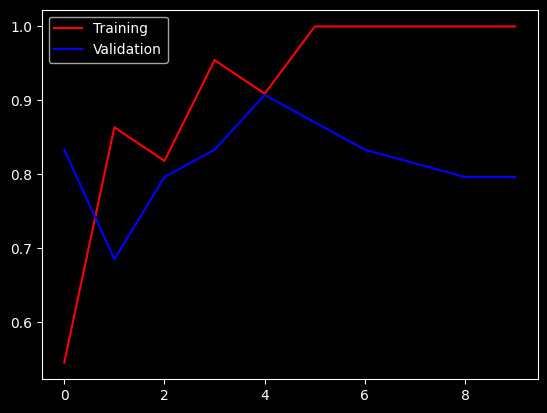

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], color='red', label='Training' )
plt.plot(history.history['val_accuracy'], color='blue', label='Validation' )
plt.legend()
plt.show()

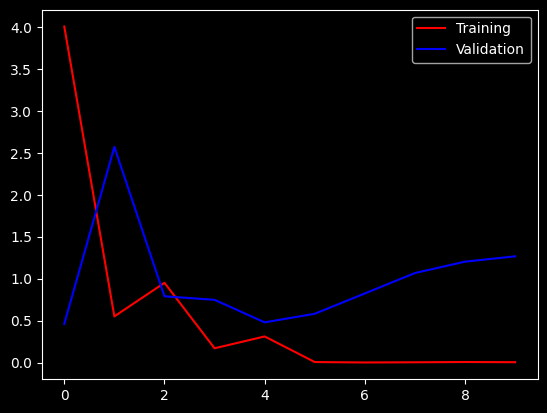

In [28]:
plt.plot(history.history['loss'], color='red', label='Training' )
plt.plot(history.history['val_loss'], color='blue', label='Validation' )
plt.legend()
plt.show()

# **AFTER DATA AUGMENTATION**

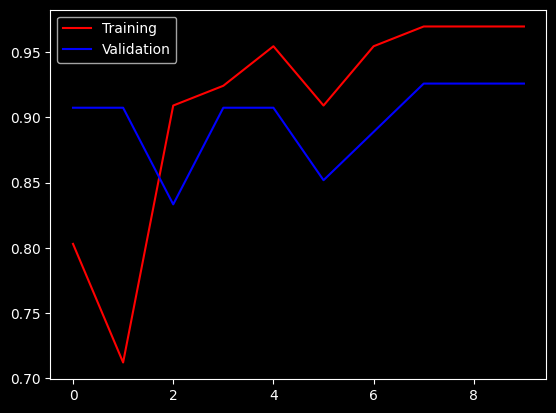

In [36]:
plt.plot(history1.history['accuracy'], color='red', label='Training' )
plt.plot(history1.history['val_accuracy'], color='blue', label='Validation' )
plt.legend()
plt.show()

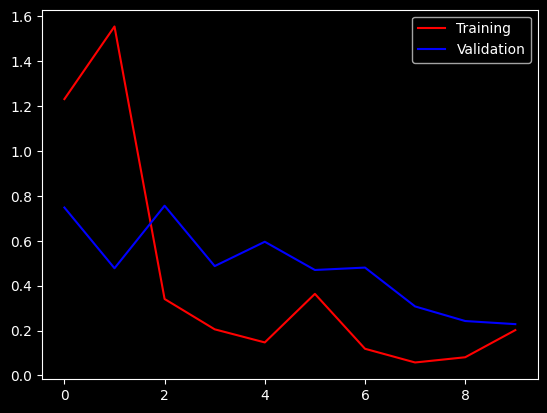

In [37]:
plt.plot(history1.history['loss'], color='red', label='Training' )
plt.plot(history1.history['val_loss'], color='blue', label='Validation' )
plt.legend()
plt.show()